# Data engineering

This notebook describes the process to download and prepare United States presidential election data. This notebook addresses missing values, reformats data types, and restructures the format of the data tables.

To download and prepare the election data, ArcPy, ArcGIS API for Python, and pandas modules are used. 

##### Import needed modules

In [7]:
import arcgis
import pandas as pd
import os
import arcpy

## Load and prepare election data

When reading the CSV into a pandas data frame, it is necessary to ensure that the county_fips field is read as an object, rather than a number, to prevent deletion of the leading 0 character used by some counties.

- Federal Information Processing Standards (FIPS)

##### Read data into Python

In [8]:
# The CSV file is in the same folder as this notebook; providing the CSV file name is sufficient.
elections_data_path = "countypres_2000-2020.csv"
elections_complete_df =  pd.read_csv(elections_data_path, dtype={"county_fips":object})
elections_complete_df

year    state state_po  ... totalvotes   version   mode
0      2000  ALABAMA       AL  ...      17208  20220315  TOTAL
1      2000  ALABAMA       AL  ...      17208  20220315  TOTAL
2      2000  ALABAMA       AL  ...      17208  20220315  TOTAL
3      2000  ALABAMA       AL  ...      17208  20220315  TOTAL
4      2000  ALABAMA       AL  ...      56480  20220315  TOTAL
...     ...      ...      ...  ...        ...       ...    ...
72612  2020  WYOMING       WY  ...       4032  20220315  TOTAL
72613  2020  WYOMING       WY  ...       3560  20220315  TOTAL
72614  2020  WYOMING       WY  ...       3560  20220315  TOTAL
72615  2020  WYOMING       WY  ...       3560  20220315  TOTAL
72616  2020  WYOMING       WY  ...       3560  20220315  TOTAL

[72617 rows x 12 columns]

Some of the table headings could be improved to better identify the data in the column. Rename these fields and; then use the pandas head function to return the first five rows of the table to confirm that the new headings are correct.

In [9]:
rename_cols = {
    "state_po": "state_abbr",
    "county_fips": "FIPS",
    "party": "pol_identity"
}
elections_complete_df.rename(columns=rename_cols, inplace=True)
elections_complete_df.head()

year    state state_abbr  ... totalvotes   version   mode
0  2000  ALABAMA         AL  ...      17208  20220315  TOTAL
1  2000  ALABAMA         AL  ...      17208  20220315  TOTAL
2  2000  ALABAMA         AL  ...      17208  20220315  TOTAL
3  2000  ALABAMA         AL  ...      17208  20220315  TOTAL
4  2000  ALABAMA         AL  ...      56480  20220315  TOTAL

[5 rows x 12 columns]

The election data includes records that are missing data in the FIPS field. This missing data is referred to as null values. You will later join this table to voting-age population data based on the FIPS value, so this value cannot be null. Identify how many rows have null values and establish a strategy for dealing with those null values.

In [10]:
# Find records with null values.
elections_complete_df.query("FIPS.isnull()")

year                 state state_abbr  ... totalvotes   version   mode
12452  2000           CONNECTICUT         CT  ...          0  20220315  TOTAL
12453  2000                 MAINE         ME  ...          0  20220315  TOTAL
12454  2000          RHODE ISLAND         RI  ...          0  20220315  TOTAL
12455  2000           CONNECTICUT         CT  ...          0  20220315  TOTAL
12456  2000                 MAINE         ME  ...          0  20220315  TOTAL
12457  2000          RHODE ISLAND         RI  ...          0  20220315  TOTAL
12458  2000           CONNECTICUT         CT  ...          0  20220315  TOTAL
12459  2000                 MAINE         ME  ...          0  20220315  TOTAL
12460  2000          RHODE ISLAND         RI  ...          0  20220315  TOTAL
12461  2000           CONNECTICUT         CT  ...          0  20220315  TOTAL
12462  2000                 MAINE         ME  ...          0  20220315  TOTAL
12463  2000          RHODE ISLAND         RI  ...          0  20220315  TOTAL
21806  2004           CONNECTICUT         CT  ...          0  20220315  TOTAL
21807  2004                 MAINE         ME  ...          0  20220315  TOTAL
21808  2004          RHODE ISLAND         RI  ...          0  20220315  TOTAL
21809  2004           CONNECTICUT         CT  ...          0  20220315  TOTAL
21810  2004                 MAINE         ME  ...          0  20220315  TOTAL
21811  2004          RHODE ISLAND         RI  ...          0  20220315  TOTAL
21812  2004           CONNECTICUT         CT  ...          0  20220315  TOTAL
21813  2004                 MAINE         ME  ...          0  20220315  TOTAL
21814  2004          RHODE ISLAND         RI  ...          0  20220315  TOTAL
31157  2008           CONNECTICUT         CT  ...          0  20220315  TOTAL
31158  2008                 MAINE         ME  ...          0  20220315  TOTAL
31159  2008          RHODE ISLAND         RI  ...          0  20220315  TOTAL
31160  2008           CONNECTICUT         CT  ...          0  20220315  TOTAL
31161  2008                 MAINE         ME  ...          0  20220315  TOTAL
31162  2008          RHODE ISLAND         RI  ...          0  20220315  TOTAL
31163  2008           CONNECTICUT         CT  ...          0  20220315  TOTAL
31164  2008                 MAINE         ME  ...          0  20220315  TOTAL
31165  2008          RHODE ISLAND         RI  ...          0  20220315  TOTAL
40508  2012           CONNECTICUT         CT  ...        918  20220315  TOTAL
40509  2012                 MAINE         ME  ...       3054  20220315  TOTAL
40510  2012          RHODE ISLAND         RI  ...        333  20220315  TOTAL
40511  2012           CONNECTICUT         CT  ...        918  20220315  TOTAL
40512  2012                 MAINE         ME  ...       3054  20220315  TOTAL
40513  2012          RHODE ISLAND         RI  ...        333  20220315  TOTAL
40514  2012           CONNECTICUT         CT  ...        918  20220315  TOTAL
40515  2012                 MAINE         ME  ...       3054  20220315  TOTAL
40516  2012          RHODE ISLAND         RI  ...        333  20220315  TOTAL
49859  2016           CONNECTICUT         CT  ...       2616  20220315  TOTAL
49860  2016                 MAINE         ME  ...       3986  20220315  TOTAL
49861  2016          RHODE ISLAND         RI  ...        728  20220315  TOTAL
49862  2016           CONNECTICUT         CT  ...       2616  20220315  TOTAL
49863  2016                 MAINE         ME  ...       3986  20220315  TOTAL
49864  2016          RHODE ISLAND         RI  ...        728  20220315  TOTAL
49865  2016           CONNECTICUT         CT  ...       2616  20220315  TOTAL
49866  2016                 MAINE         ME  ...       3986  20220315  TOTAL
49867  2016          RHODE ISLAND         RI  ...        728  20220315  TOTAL
53317  2020  DISTRICT OF COLUMBIA         DC  ...     344356  20220315  TOTAL
53318  2020  DISTRICT OF COLUMBIA         DC  ...     344356  20220315  TOTAL
53319  2020  DISTRICT OF COLU

After reviewing the records, you notice that some of the records represent votes cast in Washington, DC, for the 2020 election. Removing these records would affect hundreds of thousands of votes and make it impossible to include Washington, DC, in the analysis for 2020. Additional research indicates that the appropriate FIPS code for Washington, DC, is 11001. Add the correct FIPS code for Washington, DC, records.

In [11]:
# Add the FIPS code for Washington, DC.
elections_complete_df.loc[elections_complete_df['state_abbr'] == 'DC', 'FIPS'] = '11001'

The remaining records with null FIPS values are votes assigned at a state-wide level, not to any county. Your analysis will take place at the county level, which means that these records cannot be used. Assess the effect that removing these votes will have on your overall analysis.

In [12]:
# Determine the total number of records in the table.
rowcount = elections_complete_df.shape[0]

# Determine the total number of votes cast across all counties in all elections.
votecount = elections_complete_df["candidatevotes"].sum()

# Determine how many votes are associated with null FIPS values.
null_fips_df = elections_complete_df.query("FIPS.isnull()")
null_fips_rowcount = null_fips_df.shape[0]
null_fips_votecount = null_fips_df["candidatevotes"].sum()

# Calculate the percentage of the data affected by null records.
percentage_null_fips_rows = round((null_fips_rowcount / rowcount) * 100, 3)
percentage_null_fips_votes = round((null_fips_votecount / votecount) * 100, 3)

# Use a print statement to report this information.
print(f"There were {null_fips_rowcount} records with null FIPS values in the data, representing {null_fips_votecount} votes.")
print(f"This amounts to {percentage_null_fips_rows}% of the total records and {percentage_null_fips_votes}% of the total votes.")

There were 52 records with null FIPS values in the data, representing 13009 votes.
This amounts to 0.072% of the total records and 0.002% of the total votes.


The records with null FIPS values represent a small percentage of the total, and they are unlikely to change the overall analysis. Create a new dataframe that includes only records with non-null FIPS values.

In [13]:
# Remove records with null FIPS values.
elections_df = elections_complete_df.query("FIPS.notnull()")

Even after correcting for the missing FIPS values, the format of the election data table will prevent a proper join to the voting-age population data. Currently, each record in the table corresponds to a candidate's votes for each county for each vote mode. You need to reformat the table so that each record corresponds to a single county for each election year, with fields showing the total votes for each major party candidate for that election year in that county. It is possible to do this using the [Pivot Table geoprocessing tool](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/pivot-table.htm) or Excel pivot tables, but Python may make it easier to automate and share. 

The steps in restructuring the table are as follows:

1. Limit records to only candidates who identify as either a Democrat or a Republican
2. Sum each candidate's votes for every mode in each county, for each election year
3. Lock some fields in place, and then pivot the table using the party field.
4. Reformat the pivoted table.

The following code cell performs these steps.
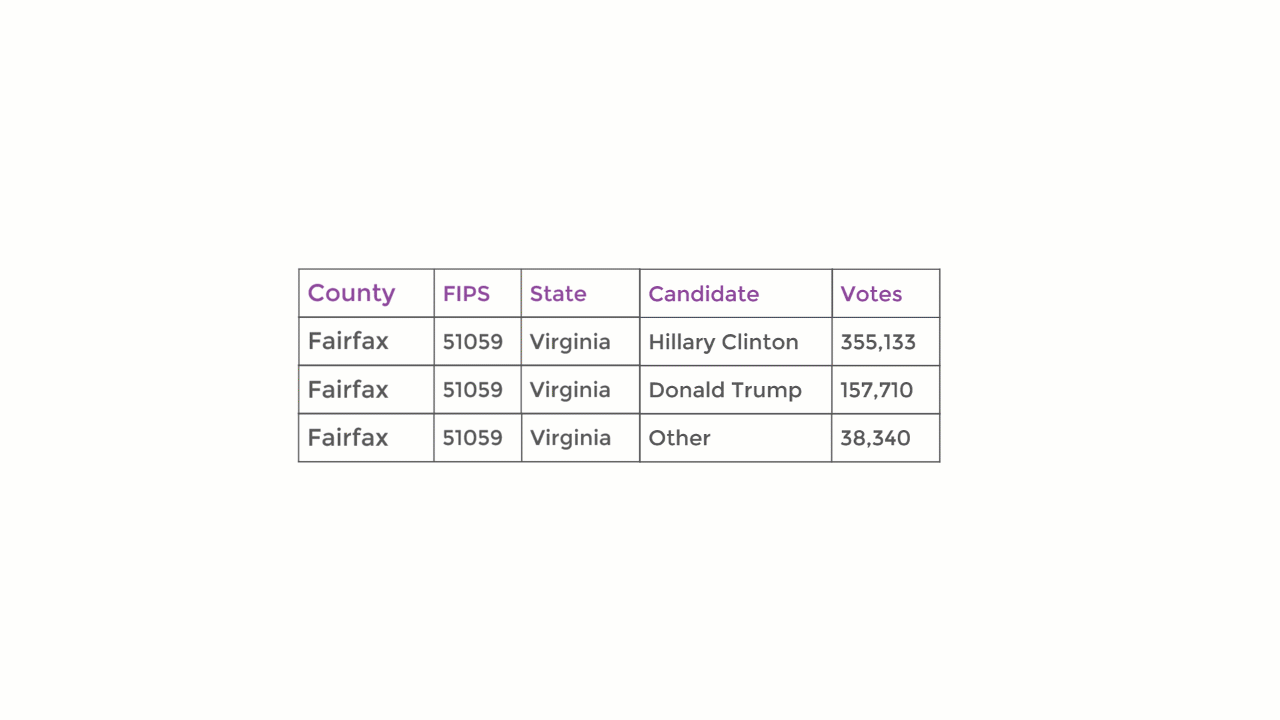

In [14]:
# Filter records by political identity for Democrats and Republicans.
elections_df = elections_df.query("pol_identity in ['DEMOCRAT', 'REPUBLICAN']")

In [15]:
# Group records for each candidate by county and year.
candidate_group = elections_df.groupby(['FIPS', 'county_name', 'state', 'candidate', 'year', 'pol_identity', 'totalvotes'])

# Sum each candidate's votes in each county, for each election year.
candidate_votes = candidate_group['candidatevotes'].sum()

# Remove the multi-index created by the group-by and sum, returning a new data frame.
candidate_votes_df = candidate_votes.reset_index()

# Check the output.
candidate_votes_df.head()

FIPS county_name    state  ... pol_identity  totalvotes candidatevotes
0  01001     AUTAUGA  ALABAMA  ...     DEMOCRAT       17208           4942
1  01001     AUTAUGA  ALABAMA  ...     DEMOCRAT       23641           6093
2  01001     AUTAUGA  ALABAMA  ...     DEMOCRAT       23932           6363
3  01001     AUTAUGA  ALABAMA  ...   REPUBLICAN       27770          19838
4  01001     AUTAUGA  ALABAMA  ...   REPUBLICAN       24973          18172

[5 rows x 8 columns]

In [16]:
# Pivot the data frame.
# The index "locks" the fields that remain the same for each county.
# The columns determine which values will become new fields; in this case, the two values in the pol_identity column become two new fields.
# The values column determines which values will be reported for each of the new fields.
elections_pivot_df = candidate_votes_df.pivot(
    index=['year', 'FIPS', 'county_name', 'state', 'totalvotes'], 
    columns=['pol_identity'], 
    values=['candidatevotes']
)

# Check the output.
elections_pivot_df.head()

candidatevotes           
pol_identity                                    DEMOCRAT REPUBLICAN
year FIPS  county_name state   totalvotes                          
2000 01001 AUTAUGA     ALABAMA 17208                4942      11993
     01003 BALDWIN     ALABAMA 56480               13997      40872
     01005 BARBOUR     ALABAMA 10395                5188       5096
     01007 BIBB        ALABAMA 7101                 2710       4273
     01009 BLOUNT      ALABAMA 17973                4977      12667

In [17]:
# Remove the multi-index since you no longer need these fields to be "locked" for the pivot.
elections_pivot_df.columns = elections_pivot_df.columns.get_level_values(1).rename(None)
elections_pivot_df.reset_index(inplace=True)

# Rename columns to better reflect their new meaning.
elections_pivot_df.rename(columns={"DEMOCRAT": "votes_dem","REPUBLICAN": "votes_gop"}, inplace=True)

# Check the output.
elections_pivot_df.head()

year   FIPS county_name    state  totalvotes  votes_dem  votes_gop
0  2000  01001     AUTAUGA  ALABAMA       17208       4942      11993
1  2000  01003     BALDWIN  ALABAMA       56480      13997      40872
2  2000  01005     BARBOUR  ALABAMA       10395       5188       5096
3  2000  01007        BIBB  ALABAMA        7101       2710       4273
4  2000  01009      BLOUNT  ALABAMA       17973       4977      12667

Pandas has three powerful capabilities that helped perform this operation: 

- The ability to perform an operation using a "groupby" function
- The ability to set an index using multiple fields, which acts as the "locking" mechanism
- The ability to unstack (or pivot) a table

## Load and prepare voting-age population data

The data includes multiple CSV files, each with estimates of the number of citizens voting in each county for a particular time period. Load each CSV file into a data frame.

A dictionary is a good data structure to use to keep track of multiple related datasets.

In [18]:
# Create a dictionary of CSV files for each election year.
cvap_paths = {
    2020: "CountyCVAP_2017-2021.csv",
    2016: "CountyCVAP_2014-2018.csv",
    2012: "CountyCVAP_2010-2014.csv",
    2008: "CountyCVAP_2006-2010.csv"
}

# Create a dictionary of data frames for each election year.
cvap_dfs = {year:pd.read_csv(path, encoding="latin-1") for year, path in cvap_paths.items()}

# Display the first three rows of each data frame to check the output.
for df in cvap_dfs.values():
    display(df.head(3))

geoname  ... cvap_moe
0  Autauga County, Alabama  ...      278
1  Autauga County, Alabama  ...      223
2  Autauga County, Alabama  ...       86

[3 rows x 12 columns]

geoname  ... cvap_moe
0  Autauga County, Alabama  ...      174
1  Autauga County, Alabama  ...      125
2  Autauga County, Alabama  ...       46

[3 rows x 12 columns]

GEONAME  ... CVAP_MOE
0  Autauga County, Alabama  ...      160
1  Autauga County, Alabama  ...      115
2  Autauga County, Alabama  ...       55

[3 rows x 12 columns]

GEONAME  ... CVAP_MOE
0  Autauga County, Alabama  ...      158
1  Autauga County, Alabama  ...      113
2  Autauga County, Alabama  ...       72

[3 rows x 12 columns]

The four separate CSV files resulted in four separate data frames, with some differences in the column headings. For this analysis, you will want a single table with estimates for total number of citizens of voting age for each year. You will also need a FIPS value to join this table to the election data above and the geoname to spotcheck data. To accomplish these goals, perform these steps:

1. Change all column headings to lowercase formatting so that each data frame has the exact same structure.
0. Add a year value to each of the data frames to differentiate their values.
0. Include only total count rows.
0. Remove any columns other than geoid, cvap_est, and year.
0. Extract the FIPS value from the geoid value.
0. Concatenate the data frames together.

In [19]:
# Create a new dictionary to hold the processed dataframes.
cvap_processed_dfs = {}

for year, df in cvap_dfs.items():
    
    # Set column formatting to lowercase.
    df.columns = df.columns.str.lower()
    
    # Add a year value.
    df['year'] = year
    
    # Include only rows of total counts.
    df = df.query("lntitle == 'Total'")

    # Include only necessary columns.
    df = df[['year', 'geoid','geoname','cvap_est']]

    # Extract FIPS from the geoid value.
    df['FIPS'] = df['geoid'].str[-5:]
    
    # Add processed data frames to the dictionary.
    cvap_processed_dfs[year] = df
    
# Concatenate the data frames.
cvap_df = pd.concat(cvap_processed_dfs.values())

# Check the output.
cvap_df

year           geoid                           geoname  cvap_est   FIPS
0      2020  0500000US01001           Autauga County, Alabama     43905  01001
13     2020  0500000US01003           Baldwin County, Alabama    174685  01003
26     2020  0500000US01005           Barbour County, Alabama     19625  01005
39     2020  0500000US01007              Bibb County, Alabama     17680  01007
52     2020  0500000US01009            Blount County, Alabama     43635  01009
...     ...             ...                               ...       ...    ...
41808  2008    05000US72145  Vega Baja Municipio, Puerto Rico     44270  72145
41821  2008    05000US72147    Vieques Municipio, Puerto Rico      6970  72147
41834  2008    05000US72149   Villalba Municipio, Puerto Rico     18830  72149
41847  2008    05000US72151    Yabucoa Municipio, Puerto Rico     28295  72151
41860  2008    05000US72153      Yauco Municipio, Puerto Rico     32120  72153

[12882 rows x 5 columns]

## Join tables

Now that both the voting-age population (cvap_df) and the election data (elections_pivot_df) tables have been prepared, they can be joined together. The combination of year and FIPS values for each county identifies a unique record, so these fields will be used to join the tables.

In [20]:
voting_info_df = pd.merge(elections_pivot_df, cvap_df, left_on=['FIPS', 'year'], right_on=['FIPS', 'year'], how='left')

# Check the output.
voting_info_df

year   FIPS  ...                     geoname cvap_est
0      2000  01001  ...                         NaN      NaN
1      2000  01003  ...                         NaN      NaN
2      2000  01005  ...                         NaN      NaN
3      2000  01007  ...                         NaN      NaN
4      2000  01009  ...                         NaN      NaN
...     ...    ...  ...                         ...      ...
18923  2020  56037  ...  Sweetwater County, Wyoming  30055.0
18924  2020  56039  ...       Teton County, Wyoming  17275.0
18925  2020  56041  ...       Uinta County, Wyoming  14205.0
18926  2020  56043  ...    Washakie County, Wyoming   5995.0
18927  2020  56045  ...      Weston County, Wyoming   5415.0

[18928 rows x 10 columns]

You notice that the missing values from the voting-age population table are for the year 2000. The earliest voting-age population data that is available starts at the 2008 election. Remove election data prior to 2008.

In [21]:
voting_info_df = voting_info_df.query("year >= 2008")

# Check the output.
voting_info_df

year   FIPS  ...                     geoname  cvap_est
6309   2008  01001  ...     Autauga County, Alabama   38010.0
6310   2008  01003  ...     Baldwin County, Alabama  130865.0
6311   2008  01005  ...     Barbour County, Alabama   20900.0
6312   2008  01007  ...        Bibb County, Alabama   17270.0
6313   2008  01009  ...      Blount County, Alabama   40605.0
...     ...    ...  ...                         ...       ...
18923  2020  56037  ...  Sweetwater County, Wyoming   30055.0
18924  2020  56039  ...       Teton County, Wyoming   17275.0
18925  2020  56041  ...       Uinta County, Wyoming   14205.0
18926  2020  56043  ...    Washakie County, Wyoming    5995.0
18927  2020  56045  ...      Weston County, Wyoming    5415.0

[12619 rows x 10 columns]

The records at the top and bottom of the data frame now look correct, but check whether there are any other null values for the cvap_est field.

In [22]:
voting_info_df.query("cvap_est.isnull()")

year   FIPS  county_name     state  ...  votes_gop  geoid  geoname cvap_est
6376   2008  02001   DISTRICT 1    ALASKA  ...       4149    NaN      NaN      NaN
6377   2008  02002   DISTRICT 2    ALASKA  ...       4029    NaN      NaN      NaN
6378   2008  02003   DISTRICT 3    ALASKA  ...       2829    NaN      NaN      NaN
6379   2008  02004   DISTRICT 4    ALASKA  ...       4302    NaN      NaN      NaN
6380   2008  02005   DISTRICT 5    ALASKA  ...       3426    NaN      NaN      NaN
...     ...    ...          ...       ...  ...        ...    ...      ...      ...
15878  2020  02038  DISTRICT 38    ALASKA  ...       1737    NaN      NaN      NaN
15879  2020  02039  DISTRICT 39    ALASKA  ...       1939    NaN      NaN      NaN
15880  2020  02040  DISTRICT 40    ALASKA  ...       1994    NaN      NaN      NaN
15881  2020  02099  DISTRICT 99    ALASKA  ...         59    NaN      NaN      NaN
17613  2020  36000  KANSAS CITY  MISSOURI  ...      26393    NaN      NaN      NaN

[158 rows x 10 columns]

The election records for Alaska appear unusual because they are referencing a district rather than a county. Additional research shows that Alaska has a unique government model that does not use counties. The election data is reported for regions that do not correspond to the counties in the voting-age population table. 

Because of this data incompatibility, remove records from the state of Alaska.

In [23]:
voting_info_df = voting_info_df.query("state != 'ALASKA'")

Next, you will query the data frame for any remaining records with null cvap_est values.

In [24]:
voting_info_df.query("cvap_est.isnull()")

year   FIPS  county_name     state  ...  votes_gop  geoid  geoname cvap_est
8148   2008  36000  KANSAS CITY  MISSOURI  ...      31854    NaN      NaN      NaN
11303  2012  36000  KANSAS CITY  MISSOURI  ...      29509    NaN      NaN      NaN
12392  2012  51515      BEDFORD  VIRGINIA  ...       1527    NaN      NaN      NaN
14458  2016  36000  KANSAS CITY  MISSOURI  ...      24654    NaN      NaN      NaN
15547  2016  51515      BEDFORD  VIRGINIA  ...          0    NaN      NaN      NaN
17613  2020  36000  KANSAS CITY  MISSOURI  ...      26393    NaN      NaN      NaN

[6 rows x 10 columns]

You notice two more issues with the data. Additional research explains each of these issues:

* Kansas City, MO (FIPS 36000), reports its election data separately from Jackson County, MO (FIPS 29095).
* The independent city of Bedford, VA (FIPS 51515), merged with Bedford County, VA (FIPS 51019), in 2013. The voting-age population data used for the 2012 and 2016 elections was published after the merger and does not include separate data for the city of Bedford.

Verify the research by querying the records of all four FIPS codes.

In [25]:
voting_info_df.query("FIPS in ['29095', '36000', '51019', '51515']")

year   FIPS  ...                   geoname  cvap_est
7850   2008  29095  ...  Jackson County, Missouri  481045.0
8148   2008  36000  ...                       NaN       NaN
9150   2008  51019  ...  Bedford County, Virginia   51755.0
9237   2008  51515  ...    Bedford city, Virginia    4595.0
11005  2012  29095  ...  Jackson County, Missouri  493440.0
11303  2012  36000  ...                       NaN       NaN
12305  2012  51019  ...  Bedford County, Virginia   58850.0
12392  2012  51515  ...                       NaN       NaN
14160  2016  29095  ...  Jackson County, Missouri  506340.0
14458  2016  36000  ...                       NaN       NaN
15460  2016  51019  ...  Bedford County, Virginia   61205.0
15547  2016  51515  ...                       NaN       NaN
17315  2020  29095  ...  Jackson County, Missouri  523040.0
17613  2020  36000  ...                       NaN       NaN
18615  2020  51019  ...  Bedford County, Virginia   62435.0

[15 rows x 10 columns]

To fix these issues, merged the data for each city into its respective county. The Pandas groupby function can pair each county with its respective city for each year and then sum the values of each pair together.

In [26]:
# Because the counties to fix are in different states, each group of a county and its associated city can be defined by year and state.
county_groups = voting_info_df.query("FIPS in ['29095', '36000', '51019', '51515']").groupby(['year', 'state'])
summed_votes = county_groups.sum()

# Match index values for summed data with original data.
summed_votes.index = voting_info_df.query("FIPS in ['29095', '51019']").sort_values('year').index

# Check the output.
summed_votes

totalvotes  votes_dem  votes_gop  cvap_est
7850       339266     210824     124687  481045.0
9150        38564      12225      25917   56350.0
11005      311566     183953     122708  493440.0
12305       40230      11434      28206   58850.0
14160      301876     168972     116211  506340.0
15460       42525       9768      30659   61205.0
17315      333063     199842     126535  523040.0
18615       48669      12176      35600   62435.0

In [27]:
# Update county records with new summed values.
voting_info_df.loc[summed_votes.index, summed_votes.columns] = summed_votes

# Eliminate Kansas City and Bedford records.
voting_info_df = voting_info_df.query("FIPS not in ['36000', '51515']")

# Check the output.
voting_info_df.query("FIPS in ['29095', '36000', '51019', '51515']")

year   FIPS  ...                   geoname  cvap_est
7850   2008  29095  ...  Jackson County, Missouri  481045.0
9150   2008  51019  ...  Bedford County, Virginia   56350.0
11005  2012  29095  ...  Jackson County, Missouri  493440.0
12305  2012  51019  ...  Bedford County, Virginia   58850.0
14160  2016  29095  ...  Jackson County, Missouri  506340.0
15460  2016  51019  ...  Bedford County, Virginia   61205.0
17315  2020  29095  ...  Jackson County, Missouri  523040.0
18615  2020  51019  ...  Bedford County, Virginia   62435.0

[8 rows x 10 columns]

The county records now show the correct sum, and the records for Kansas City and the city of Bedford have been removed from the data frame.

In [28]:
# Verify that no record in the output data frame has a null cvap_est value.
voting_info_df.query("cvap_est.isnull()")

Empty DataFrame
Columns: [year, FIPS, county_name, state, totalvotes, votes_dem, votes_gop, geoid, geoname, cvap_est]
Index: []

## Calculate additional columns

Use the values from the updated table to add additional columns of information, such as the number of voters who did not choose the Democratic or Republican party, the percentage of voters for each party, and so on. Each column is referred to as an attribute of the dataset.

In [29]:
# Calculate voters who did not choose the Democratic or Republican party.
voting_info_df['votes_other'] = voting_info_df['totalvotes'] - (voting_info_df['votes_dem'] + voting_info_df['votes_gop'])

# Calculate voter share attributes.
voting_info_df['voter_share_major_party'] = (voting_info_df['votes_dem'] + voting_info_df['votes_gop']) / voting_info_df['totalvotes']
voting_info_df['voter_share_dem'] = voting_info_df['votes_dem'] / voting_info_df['totalvotes']
voting_info_df['voter_share_gop'] = voting_info_df['votes_gop'] / voting_info_df['totalvotes']
voting_info_df['voter_share_other'] = voting_info_df['votes_other'] / voting_info_df['totalvotes']

# Calculate raw difference attributes.
voting_info_df['rawdiff_dem_vs_gop'] = voting_info_df['votes_dem'] - voting_info_df['votes_gop']
voting_info_df['rawdiff_gop_vs_dem'] = voting_info_df['votes_gop'] - voting_info_df['votes_dem']
voting_info_df['rawdiff_dem_vs_other'] = voting_info_df['votes_dem'] - voting_info_df['votes_other']
voting_info_df['rawdiff_gop_vs_other'] = voting_info_df['votes_gop'] - voting_info_df['votes_other']
voting_info_df['rawdiff_other_vs_dem'] = voting_info_df['votes_other'] - voting_info_df['votes_dem']
voting_info_df['rawdiff_other_vs_gop'] = voting_info_df['votes_other'] - voting_info_df['votes_gop']

# Calculate percentage difference attributes.
voting_info_df['pctdiff_dem_vs_gop'] = (voting_info_df['votes_dem'] - voting_info_df['votes_gop']) / voting_info_df['totalvotes']
voting_info_df['pctdiff_gop_vs_dem'] = (voting_info_df['votes_gop'] - voting_info_df['votes_dem']) / voting_info_df['totalvotes']
voting_info_df['pctdiff_dem_vs_other'] = (voting_info_df['votes_dem'] - voting_info_df['votes_other']) / voting_info_df['totalvotes']
voting_info_df['pctdiff_gop_vs_other'] = (voting_info_df['votes_gop'] - voting_info_df['votes_other']) / voting_info_df['totalvotes']
voting_info_df['pctdiff_other_vs_dem'] = (voting_info_df['votes_other'] - voting_info_df['votes_dem']) / voting_info_df['totalvotes']
voting_info_df['pctdiff_other_vs_gop'] = (voting_info_df['votes_other'] - voting_info_df['votes_gop']) / voting_info_df['totalvotes']

# Calculate voter turnout attributes.
voting_info_df['voter_turnout'] = voting_info_df['totalvotes'] / voting_info_df['cvap_est']
voting_info_df['voter_turnout_majparty'] = (voting_info_df['votes_dem']+voting_info_df['votes_gop']) / voting_info_df['cvap_est']
voting_info_df['voter_turnout_dem'] = voting_info_df['votes_dem'] / voting_info_df['cvap_est']
voting_info_df['voter_turnout_gop'] = voting_info_df['votes_gop'] / voting_info_df['cvap_est']
voting_info_df['voter_turnout_other'] = voting_info_df['votes_other'] / voting_info_df['cvap_est']

# Determine the winning political party.
def return_winning_party(total_votes_dem, total_votes_gop, total_votes_other):
    if total_votes_dem > total_votes_gop and total_votes_dem > total_votes_other:
        return "Democratic Party"
    elif total_votes_gop > total_votes_dem and total_votes_gop > total_votes_other:
        return "Republican Party"
    elif total_votes_other > total_votes_dem and total_votes_other > total_votes_gop:
        return "Other Party"
    
voting_info_df["Winning Party"] = voting_info_df.apply(
    lambda x: return_winning_party(
        x.votes_dem, 
        x.votes_gop,
        x.votes_other
    ), axis=1)

# Check the output.
voting_info_df.head()

year   FIPS  ... voter_turnout_other     Winning Party
6309  2008  01001  ...            0.003815  Republican Party
6310  2008  01003  ...            0.005777  Republican Party
6311  2008  01005  ...            0.003206  Republican Party
6312  2008  01007  ...            0.004806  Republican Party
6313  2008  01009  ...            0.008767  Republican Party

[5 rows x 33 columns]

## Validate the data

Before continuing with other data preparation, you should confirm that the output data has been successfully created. 

First, you will validate the values for voter turnout. Because these values represent a fraction (total votes divided by voting age population), Confirm that the values range between 0 and 1.

In [30]:
voting_info_df['voter_turnout'].describe()

count    12448.000000
mean         0.609919
std          0.101349
min          0.168894
25%          0.542592
50%          0.609886
75%          0.674621
max          2.155556
Name: voter_turnout, dtype: float64

The max value in the column is above 1, indicating a voter turnout above 100%. further investigate these anomalous records.

In [31]:
# Perform query for voter turnout above 100%.
turnout_over_1_df = voting_info_df.query('voter_turnout > 1')[['FIPS','county_name','state','year','voter_turnout','totalvotes','cvap_est']].sort_values(['FIPS', 'year'])
turnout_over_1_df

FIPS   county_name         state  ...  voter_turnout  totalvotes  cvap_est
6592   08053      HINSDALE      COLORADO  ...       1.346067         599     445.0
16070  08079       MINERAL      COLORADO  ...       1.103650         756     685.0
12931  08111      SAN JUAN      COLORADO  ...       1.065263         506     475.0
16348  16025         CAMAS         IDAHO  ...       1.040000         754     725.0
17399  30033      GARFIELD       MONTANA  ...       1.069737         813     760.0
7955   30075  POWDER RIVER       MONTANA  ...       1.109881        1404    1265.0
17443  31009        BLAINE      NEBRASKA  ...       1.056667         317     300.0
8126   35021       HARDING    NEW MEXICO  ...       1.061017         626     590.0
11281  35021       HARDING    NEW MEXICO  ...       1.102752         601     545.0
14436  35021       HARDING    NEW MEXICO  ...       1.351282         527     390.0
17591  35021       HARDING    NEW MEXICO  ...       1.160920         505     435.0
8712   46061        HANSON  SOUTH DAKOTA  ...       1.056455        2414    2285.0
11867  46061        HANSON  SOUTH DAKOTA  ...       1.061978        2416    2275.0
18177  46061        HANSON  SOUTH DAKOTA  ...       1.001258        2388    2385.0
18325  48033        BORDEN         TEXAS  ...       1.139726         416     365.0
8974   48261        KENEDY         TEXAS  ...       1.035897         202     195.0
18439  48261        KENEDY         TEXAS  ...       2.155556         194      90.0
18440  48263          KENT         TEXAS  ...       1.050000         462     440.0
18443  48269          KING         TEXAS  ...       1.060000         159     150.0
8994   48301        LOVING         TEXAS  ...       1.975000          79      40.0
15304  48301        LOVING         TEXAS  ...       1.083333          65      60.0
18459  48301        LOVING         TEXAS  ...       1.320000          66      50.0
15309  48311      MCMULLEN         TEXAS  ...       1.050526         499     475.0
18464  48311      MCMULLEN         TEXAS  ...       1.063918         516     485.0
18567  49009       DAGGETT          UTAH  ...       1.650667         619     375.0

[25 rows x 7 columns]

All of these counties have small populations, which makes it harder to estimate their population of citizens of voting age with a high degree of accuracy. There is also a temporal mismatch between the two datasets used to calculate voter turnout. The estimates for citizens of voting age are compiled from American Community Survey results averaged over a five-year period. The number of votes was calculated at a specific point in time, which may not correspond to the five-year average.

There are three main ways you could address the impossibly high voter turnout values for these counties:

* Drop the records from the analysis.
* Keep the records as they are.
* Adjust the records to a plausible value.

Dropping the records means certain locations will have no data, making it harder to perform a spatial analysis. Keeping the current wrong values will reduce the quality of analysis results. Capping the voter turnout at 1 is a better measure of the actual voter turnout than the current values, especially since the small sizes of these counties indicate that the most likely source of the issue is an underestimate of the population of citizens of voting age.

Adjust the voter_turnout value for each of these records to 1.

In [32]:
# Adjust values.
voting_info_df.loc[voting_info_df['voter_turnout'] > 1, 'voter_turnout'] = 1

# Describe data distribution.
voting_info_df['voter_turnout'].describe()

count    12448.000000
mean         0.609503
std          0.098447
min          0.168894
25%          0.542592
50%          0.609886
75%          0.674621
max          1.000000
Name: voter_turnout, dtype: float64

## Create the modeling dataset using the 2020 election as response

In the current voting_info_df table, each record represents a county and a year. To analyze voter turnout in the 2020 election, you need a dataset where each county is represented only once. One option would be to drop data from previous elections from the table. But previous election turnout values might be useful in predicting turnout for 2020.  

Pivot the table so that each county has one record and so that data for each election is in separate columns.

In [33]:
voting_info_pivot_df = voting_info_df.pivot(
    index=['FIPS'], 
    columns=['year'], 
    values=['totalvotes', 'cvap_est', 'voter_turnout', 'voter_turnout_dem', 'voter_turnout_gop', 'pctdiff_dem_vs_gop', 'rawdiff_dem_vs_gop', 'Winning Party'])

voting_info_pivot_df

totalvotes         ...     Winning Party                  
year        2008   2012  ...              2016              2020
FIPS                     ...                                    
01001      23641  23932  ...  Republican Party  Republican Party
01003      81413  85338  ...  Republican Party  Republican Party
01005      11630  11509  ...  Republican Party  Republican Party
01007       8644   8420  ...  Republican Party  Republican Party
01009      24267  24006  ...  Republican Party  Republican Party
...          ...    ...  ...               ...               ...
56037      16833  16895  ...  Republican Party  Republican Party
56039      12359  11464  ...  Democratic Party  Democratic Party
56041       8418   8539  ...  Republican Party  Republican Party
56043       4100   3944  ...  Republican Party  Republican Party
56045       3414   3359  ...  Republican Party  Republican Party

[3113 rows x 32 columns]

If any counties did not have records for a particular election, the pivoted data frame will show null values for those years. Checked whether any records have null values in any field.

In [34]:
voting_info_pivot_df[voting_info_pivot_df.isna().any(axis=1)]

totalvotes        ...     Winning Party                  
year        2008  2012  ...              2016              2020
FIPS                    ...                                    
46102        NaN   NaN  ...  Democratic Party  Democratic Party
46113       3314  3145  ...               NaN               NaN

[2 rows x 32 columns]

Additional research shows that Shannon County, SD (FIPS 46113), was renamed Oglala Lakota County in 2014 and assigned a new FIPS code (46102), which explains the missing data.

To facilitate analysis over time, replaced the old FIPS code with the new one in the voting_info_df table and then repivot that dataframe.

In [35]:
# Make a copy of the data frame.
voting_info_fix_df = voting_info_df.copy()

# Fix the FIPS code for Oglala Lakota County.
voting_info_fix_df.loc[voting_info_fix_df['FIPS'] == '46113', 'FIPS'] = '46102'

# Pivot the table so that there is a single entry for each county.
voting_info_pivot_df = voting_info_fix_df.pivot(
    index=['FIPS'], 
    columns=['year'], 
    values=['totalvotes', 'cvap_est', 'voter_turnout', 'voter_turnout_dem', 'voter_turnout_gop', 'pctdiff_dem_vs_gop', 'rawdiff_dem_vs_gop', 'Winning Party'])

# Check the output to ensure there are no null values in any field.
voting_info_pivot_df[voting_info_pivot_df.isna().any(axis=1)]

Empty DataFrame
Columns: [(totalvotes, 2008), (totalvotes, 2012), (totalvotes, 2016), (totalvotes, 2020), (cvap_est, 2008), (cvap_est, 2012), (cvap_est, 2016), (cvap_est, 2020), (voter_turnout, 2008), (voter_turnout, 2012), (voter_turnout, 2016), (voter_turnout, 2020), (voter_turnout_dem, 2008), (voter_turnout_dem, 2012), (voter_turnout_dem, 2016), (voter_turnout_dem, 2020), (voter_turnout_gop, 2008), (voter_turnout_gop, 2012), (voter_turnout_gop, 2016), (voter_turnout_gop, 2020), (pctdiff_dem_vs_gop, 2008), (pctdiff_dem_vs_gop, 2012), (pctdiff_dem_vs_gop, 2016), (pctdiff_dem_vs_gop, 2020), (rawdiff_dem_vs_gop, 2008), (rawdiff_dem_vs_gop, 2012), (rawdiff_dem_vs_gop, 2016), (rawdiff_dem_vs_gop, 2020), (Winning Party, 2008), (Winning Party, 2012), (Winning Party, 2016), (Winning Party, 2020)]
Index: []

The pivoted data frame has a multi-index for column names. flattened the multi-index and renamed each column with the appropriate year.

In [36]:
voting_info_pivot_df.columns = [f"{a}_{b}" for a, b in voting_info_pivot_df.columns]
voting_info_pivot_df = voting_info_pivot_df.reset_index()
voting_info_pivot_df

FIPS totalvotes_2008  ... Winning Party_2016 Winning Party_2020
0     01001           23641  ...   Republican Party   Republican Party
1     01003           81413  ...   Republican Party   Republican Party
2     01005           11630  ...   Republican Party   Republican Party
3     01007            8644  ...   Republican Party   Republican Party
4     01009           24267  ...   Republican Party   Republican Party
...     ...             ...  ...                ...                ...
3107  56037           16833  ...   Republican Party   Republican Party
3108  56039           12359  ...   Democratic Party   Democratic Party
3109  56041            8418  ...   Republican Party   Republican Party
3110  56043            4100  ...   Republican Party   Republican Party
3111  56045            3414  ...   Republican Party   Republican Party

[3112 rows x 33 columns]

***

## Geoenable the data

To use this data in a spatial analysis, the data needs to include location information to determine where each county is located on a map. This step geocodes the data by joining it to existing county geometries. 

There are various resources that you can use to find geoenabled data. [ArcGIS Living Atlas of the World](https://livingatlas.arcgis.com) is an authoritative source provided by Esri. Each record in your election data represents information for a county, so you will use an ArcGIS Living Atlas dataset that represents county geometry.

ArcGIS API for Python, which you imported at the beginning of this notebook, extends the pandas data frame to allow spatially enabled data frames that can hold geometry. Converting the feature layer from ArcGIS Living Atlas to a spatially enabled data frame will allow you to join that geometry to the voting data.

**Note: Executing the following cell may take a few minutes.**

In [37]:
# The relevant layer is available to the public, so you can connect to ArcGIS Online anonymously.
gis = arcgis.gis.GIS()

# Get the USA Census counties layer from ArcGIS Living Atlas. 
item = gis.content.get('14c5450526a8430298b2fa74da12c2f4')

# Convert the layer to a spatially enabled data frame.
counties_sdf = pd.DataFrame.spatial.from_layer(item.layers[0])
counties_sdf.head()

COUNTY_FIPS   FIPS            NAME  ...  STATE_NAME  Shape__Area  Shape__Length
0         001  01001  Autauga County  ...     Alabama     0.150256       2.066033
1         003  01003  Baldwin County  ...     Alabama     0.398404       9.305629
2         005  01005  Barbour County  ...     Alabama      0.22327        2.69526
3         007  01007     Bibb County  ...     Alabama     0.156473       1.887519
4         009  01009   Blount County  ...     Alabama     0.164405       2.423466

[5 rows x 13 columns]

The SHAPE field in the spatially enabled data frame represents the county geometry and is used to locate each record, or feature, on the map. I join that geometry with the voting information created earlier.

In [38]:
# Join the voting information dataframe with the counties geometry.
geo_sdf = pd.merge(counties_sdf, voting_info_pivot_df, left_on='FIPS', right_on='FIPS', how='right')
geo_sdf.head()

COUNTY_FIPS   FIPS  ... Winning Party_2016  Winning Party_2020
0         001  01001  ...   Republican Party    Republican Party
1         003  01003  ...   Republican Party    Republican Party
2         005  01005  ...   Republican Party    Republican Party
3         007  01007  ...   Republican Party    Republican Party
4         009  01009  ...   Republican Party    Republican Party

[5 rows x 45 columns]

The merge used a right join to ensure that every record in the election data is included in the output. However, with a right join, it is possible that election records for some counties were not joined to a geometry. To confirm that the join was successful, I check to see whether any record has null geometry.

In [39]:
geo_sdf.query("SHAPE.isnull()")

Empty DataFrame
Columns: [COUNTY_FIPS, FIPS, NAME, OBJECTID, POPULATION, POP_SQMI, SHAPE, SQMI, STATE_ABBR, STATE_FIPS, STATE_NAME, Shape__Area, Shape__Length, totalvotes_2008, totalvotes_2012, totalvotes_2016, totalvotes_2020, cvap_est_2008, cvap_est_2012, cvap_est_2016, cvap_est_2020, voter_turnout_2008, voter_turnout_2012, voter_turnout_2016, voter_turnout_2020, voter_turnout_dem_2008, voter_turnout_dem_2012, voter_turnout_dem_2016, voter_turnout_dem_2020, voter_turnout_gop_2008, voter_turnout_gop_2012, voter_turnout_gop_2016, voter_turnout_gop_2020, pctdiff_dem_vs_gop_2008, pctdiff_dem_vs_gop_2012, pctdiff_dem_vs_gop_2016, pctdiff_dem_vs_gop_2020, rawdiff_dem_vs_gop_2008, rawdiff_dem_vs_gop_2012, rawdiff_dem_vs_gop_2016, rawdiff_dem_vs_gop_2020, Winning Party_2008, Winning Party_2012, Winning Party_2016, Winning Party_2020]
Index: []

Because no record has null geometry, you know that every voting record was joined to a county.

## Convert data frames to feature classes

##### Define the ArcGIS Pro project, map, workspace, and database

In [40]:
# Create variables that represent the ArcGIS Pro project and map.
aprx = arcpy.mp.ArcGISProject("CURRENT")
m = aprx.listMaps('Data Engineering')[0]

# Create a variable that represents the default file geodatabase.
arcpy.env.workspace = aprx.defaultGeodatabase
arcpy.env.addOutputsToMap = False

In [41]:
arcpy.env.workspace

'C:\\Users\\HP\\Downloads\\Google Cloud Partner Kickstart\\GCP Professional Data Engineer\\ESRI - Spatial Data Science MOOC\\EsriTraining\\DataEngineering_and_Visualization\\DataEngineering_and_Visualization\\DataEngineering_and_Visualization.gdb'

The pandas extension provided by the ArcGIS API for Python also enables exporting a spatially enabled data frame to a feature class.

**Note: Executing the following cell may take a few minutes**

In [42]:
# Create a feature class for the 2020 presidential election.
out_fc_name = "county_elections_pres"
out_fc_path = os.path.join(arcpy.env.workspace, out_fc_name)
out_fc = geo_sdf.spatial.to_featureclass(out_fc_path)
out_fc

'C:\\Users\\HP\\Downloads\\Google Cloud Partner Kickstart\\GCP Professional Data Engineer\\ESRI - Spatial Data Science MOOC\\EsriTraining\\DataEngineering_and_Visualization\\DataEngineering_and_Visualization\\DataEngineering_and_Visualization.gdb\\county_elections_pres'

You used an ArcGIS notebook to complete the necessary data engineering tasks. Data engineering was needed to prepare this data for a predictive analysis that will model voter turnout using demographic variables, such as per capita income.


***